In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysr import PySRRegressor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


## Importando os dados

In [2]:
grafeno = pd.read_csv('dados_RS/Neutral_Graphene_Oxide_Nanoflake_Dataset.csv')

##### Vamos trabalhar predizendo a relação entre a energia de Fermi e outras caracteristicas que o grafeno possui, e que estão presentes no banco de dados

In [3]:
grafeno = grafeno.select_dtypes(include=[np.number])

In [4]:
grafeno.fillna(grafeno.mean(), inplace=True)

In [5]:
for i in grafeno.columns:
    print(i)

charge_state
C
H
O
atom_number_total
C_concentration
H_concentration
O_concentration
avg_diameter
max_diameter
min_diameter
std_diameter
skew_diameter
kurt_diameter
anisotropy
area
AC_edge
ZZ_edge
total_edge
defects_count
defects_concentration
max_oop
mae_oop
std_oop
rmse_oop
residual_oop
ether_count
hydroxyl_count
carboxyl_count
edge_hydrogen_count
all_agent_group_count
ether_concentration
hydroxyl_concentration
carboxyl_concentration
def_local_ether_count
def_local_hydroxyl_count
def_local_carboxyl_count
def_local_other_count
max_bond_angle
max_bond_length
volume_per_atom
density_of_dangling_bonds
mass_density
particle_density
C-C:total_number
C-C:mean_value
C-C:error
C-C_sp1-sp1:total_number
C-C_sp1-sp1:mean_value
C-C_sp1-sp1:error
C-C_sp1-sp2:total_number
C-C_sp1-sp2:mean_value
C-C_sp1-sp2:error
C-C_sp1-sp3:total_number
C-C_sp1-sp3:mean_value
C-C_sp1-sp3:error
C-C_sp1-strained:total_number
C-C_sp1-strained:mean_value
C-C_sp1-strained:error
C-C_sp2-sp2:total_number
C-C_sp2-sp2:mean_

In [6]:
print(grafeno['electron_affinity'].apply(type).unique()) 

[<class 'float'>]


In [7]:
y = grafeno['Fermi_energy'].to_numpy()
X = grafeno[['total_energy', 'ionization_potential', 'electron_affinity', 'band_gap', 'electronegativity']].to_numpy()

In [8]:
model = PySRRegressor(
    maxsize=20,
    niterations=20,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        "square",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)


In [9]:
model.fit(X, y)

c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2582: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
c:\Users\isama\anaconda3\Lib\site-packages\pysr\sr.py:2029: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://astroautomata.com/PySR/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(


Compiling Julia backend...


[ Info: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form.
[ Info: Started!



Expressions evaluated per second: 7.370e+03
Head worker occupation: 1.9%
Progress: 15 / 300 total iterations (5.000%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           2.264e+01  7.971e+00  y = inv(x₄)
3           1.899e-01  4.781e+00  y = x₄ + -0.064005
4           1.870e-01  1.511e-02  y = inv(sin(inv(x₄)))
5           1.801e-01  3.766e-02  y = inv(sin(sin(inv(x₄))))
6           8.822e-02  7.137e-01  y = square(square(-1.3317)) * inv(-0.63205)
8           7.630e-02  7.257e-02  y = ((x₄ + -2.5076) * square(-0.71616)) + -1.1275
10          7.262e-02  2.471e-02  y = ((x₄ + cos(-1.4775)) * square(cos(2.3512))) + -2.5775
11          3.255e-02  8.025e-01  y = (x₄ + (exp(x₄) * inv(-0.65104 * 0.061646))) + 0.18181
12          2.924e-02  1.071e-01  y = (x₄ + (exp(x₄) * inv(sin(-0.65104) * 0.061646))) + 0.18181
13          2.787e-02  4.814e-02  y = ((exp(x₄) * inv(sin(sin(-0.6

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                        -0.34784007   
	1         2.746133                              1.479783 + -6.4371424   
	2         0.716579                               sin(x2) + -5.5697203   
	3         0.280626                        -5.845732 + square(sin(x4))   
	4         0.105555               square(square(sin(x4))) + -5.7342687   
	5         0.216043           square(cos(1.2572118 + x4)) + -5.6566277   
	6   >>>>  0.295976     square(cos(-2.8451931 + cos(x4))) + -5.6969013   
	7         0.042779  (-4.8500485 + (cos(cos(x4) + 0.27305454) * 1.7...   
	8         0.001500  (-6.279357 + sin(0.687295)) + cos(square(sin(0...   
	9         0.018117  cos((1.6862656 * sin(sin(cos(x4)))) + square(s...   
	10        0.009131  cos((1.6862656 * sin(cos(x4))) + square(sin(si...   
	11        0.026259  cos((sin(sin(cos(x4))) * 1.6862656) + square(s...   
	12        0.152031  (-6.2739677 + square(-0.8229477)) + sin(cos(co...   
	13        0.004207  (square(-0.81519616) + -6.245105) + sin(cos(co...   
	
	         loss  complexity  
	0   21.335472           1  
	1    0.087870           3  
	2    0.042918           4  
	3    0.032416           5  
	4    0.029169           6  
	5    0.023501           7  
	6    0.017480           8  
	7    0.015375          11  
	8    0.015283          15  
	9    0.015009          16  
	10   0.014872          17  
	11   0.014487          18  
	12   0.012444          19  
	13   0.012391          20  
]

In [10]:
print(model.get_best())

complexity                                                       8
loss                                                       0.01748
score                                                     0.295976
equation            square(cos(-2.8451931 + cos(x4))) + -5.6969013
sympy_format               cos(cos(x4) - 2.8451931)**2 - 5.6969013
lambda_format    PySRFunction(X=>cos(cos(x4) - 2.8451931)**2 - ...
Name: 6, dtype: object


In [13]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y,model.predict(X), squared=False)

c:\Users\isama\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
print(RMSE)

0.13221357344839896


In [ ]:
def plot_real_vs_pred(y_true, y_pred, title="Valores Reais vs. Previstos"):
    """
    Plota um gráfico de dispersão comparando os valores reais com os previstos.

    Parâmetros:
        y_true (array-like): Valores reais.
        y_pred (array-like): Valores previstos.
        title (str): Título do gráfico.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.7, color='orange')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r', label="Linha Ideal (y = x)")
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Previsto")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig(f"RS_Teste_oficial_RMSE{}")
    plt.tight_layout()
    plt.show()

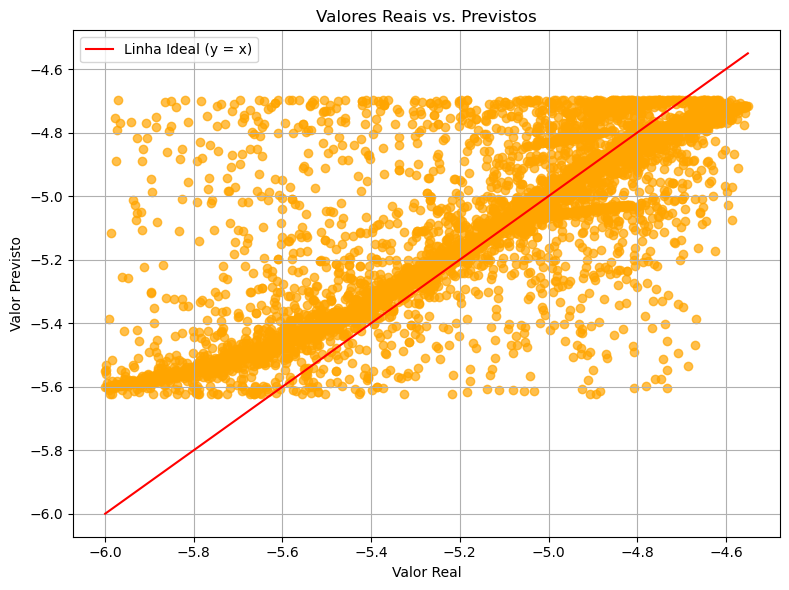

In [18]:
y_pred = model.predict(X)
plot_real_vs_pred(y, y_pred)